In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
df = pd.read_csv('Boston Housing Dataset.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [75]:
df.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [77]:
df.shape

(506, 15)

In [78]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.isna().sum()

,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [81]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


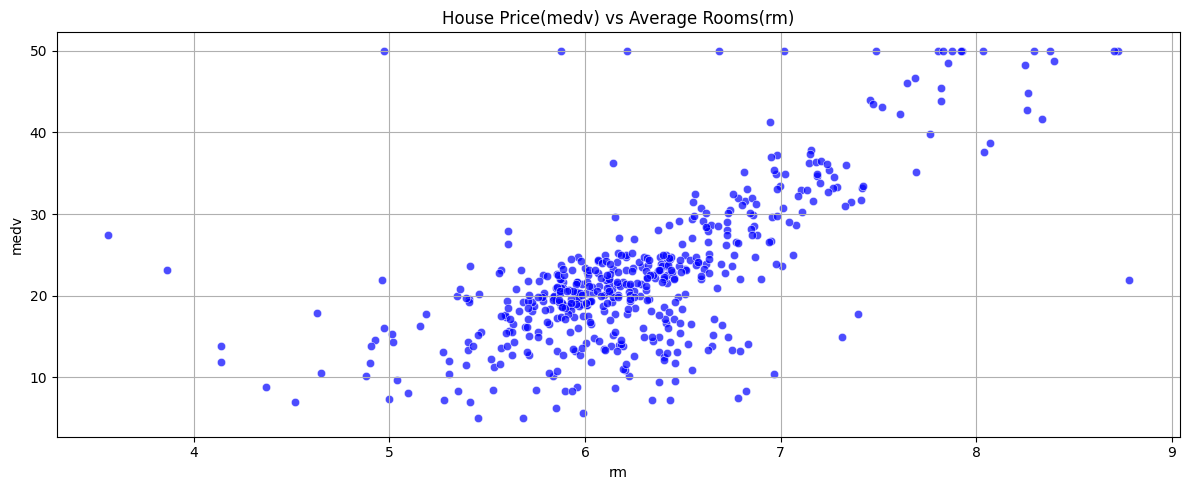

In [82]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='rm', y='medv', color='blue', alpha=0.7)
plt.title('House Price(medv) vs Average Rooms(rm)')
plt.grid(True)
plt.tight_layout()
plt.show()

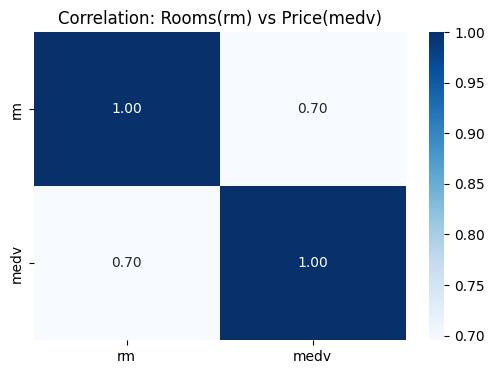

In [83]:
subset = df[['rm', 'medv']]
corr = subset.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation: Rooms(rm) vs Price(medv)')
plt.show()

In [84]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [86]:
numeric_cols = [
    'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
    'rad', 'tax', 'ptratio', 'black', 'lstat',
]

scaler = MinMaxScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [90]:
print("Linear Regression")
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
print("Testing R2:", r2_score(y_test, y_test_pred) * 100)

Linear Regression
Testing MAE: 3.2007547573408273
Testing MSE: 24.497819777630394
Testing R2: 66.59408703343036


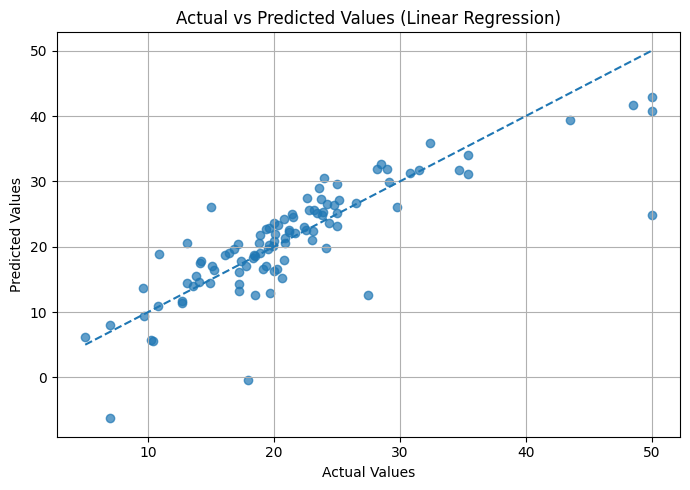

In [91]:
plt.figure(figsize=(7, 5))

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()

In [93]:
print("Number of original features:", X_train.shape[1])
print("Number of polynomial features:", X_train_poly.shape[1])

Number of original features: 14
Number of polynomial features: 120


In [94]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [95]:
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

In [96]:
print("Polynomial Regression")
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
print("Testing R2:", r2_score(y_test, y_test_pred) * 100)

Polynomial Regression
Testing MAE: 2.4508886808476205
Testing MSE: 14.629017096505724
Testing R2: 80.05146268736247
